In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi^2$, investigate the motion of the particles from $t = 0$ to $t = 10$

### New value of G = 4$\pi^2$

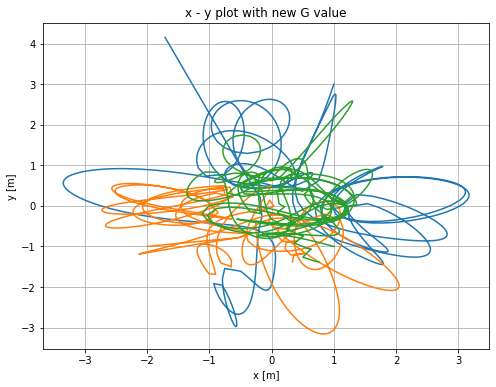

In [2]:
# This whole thing was done thanks to vicky for explaining stuff to me otherwise I would still be confused af =.=

# Given the info of the the objects as [m, x, y, vx, vy]
# mass1 = [3, (1, 3), (0, 0)]
# mass2 = [4, (-2, -1), (0, 0)]
# mass3 = [5, (1, -1), (0, 0)]

t = np.arange(0,10,0.01)

# rearrage this coords in [x1, x2, x3, y1, y2, y3, vx1, vx2, vx3, vy1, vy2, vy3] format
# because i tried it using [x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3] and i got the indexing messed up
coords = [1, -2, 1, 3, -1, -1, 0, 0, 0, 0, 0, 0]

mass = [3,4,5]
N = 3

# Define constants 
G1 = 4*np.pi
G2 = 4*np.pi**2

def xacc(coords, i, j):
#     print(coords)
#     print('i',i,'j',j)
    m = mass[j]
#     print('m',m)
    x1 = coords[i]
    y1 = coords[i+N]
    x2 = coords[j]
    y2 = coords[j+N]
#     print(x1,y1,x2,y2)
    return m * (x2 - x1) / np.sqrt((x2-x1)**2 + (y2-y1)**2)**3

def yacc(coords, i, j):
    m = mass[j]
    x1 = coords[i]
    y1 = coords[i+N]
    x2 = coords[j]
    y2 = coords[j+N]
    return m * (y2 - y1) / np.sqrt((x2-x1)**2 + (y2-y1)**2)**3

def xdd(coords, i):
    # where i is the index of the coord
    # This function to remove duplicate coord, multiply by G, and to the summation
    index = list(range(3)) 
    index.remove(i) # to avoid same coord
#     print('indices',index)
    return G2 * np.sum([xacc(coords, i, j) for j in index])

def ydd(coords, i):
    # where i is the index of the coord
    # This function to remove duplicate coord, multiply by G, and to the summation
    index = list(range(3)) 
    index.remove(i) # to avoid same coord
    return G2 * np.sum([yacc(coords, i, j) for j in index])

def rhs(y, t):
    # This one I need to return [vx, vy, ax, ay] by having the ax and ay from the functions above 
    vx = y[6:9]
    vy = y[9:]
    ax = [xdd(y, i) for i in range(3)]
    ay = [ydd(y, i) for i in range(3)]
    return np.concatenate((vx, vy, ax, ay))

y = odeint(rhs, coords, t)
# y is in the form [x1, x2, x3, y1, y2, y3, vx1, vx2, vx3, vy1, vy2, vy3]

#Let's try to plot x1, y1
plt.figure(figsize = (8,6))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('x - y plot with new G value')
plt.grid()
x1 = y[:,0]
y1 = y[:,3]
x2 = y[:,1]
y2 = y[:,4]
x3 = y[:,2]
y3 = y[:,5]
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

### Old value of G = 4$\pi$

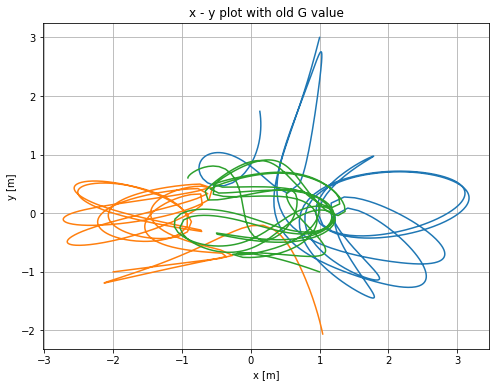

In [3]:
def xdd2(coords, i):
    # where i is the index of the coord
    # This function to remove duplicate coord, multiply by G, and to the summation
    index = list(range(3)) 
    index.remove(i) # to avoid same coord
#     print('indices',index)
    return G1 * np.sum([xacc(coords, i, j) for j in index])

def ydd2(coords, i):
    # where i is the index of the coord
    # This function to remove duplicate coord, multiply by G, and to the summation
    index = list(range(3)) 
    index.remove(i) # to avoid same coord
    return G1 * np.sum([yacc(coords, i, j) for j in index])

def rhs2(y, t):
    # This one I need to return [vx, vy, ax, ay] by having the ax and ay from the functions above 
    vx = y[6:9]
    vy = y[9:]
    ax = [xdd2(y, i) for i in range(3)]
    ay = [ydd2(y, i) for i in range(3)]
    return np.concatenate((vx, vy, ax, ay))

y = odeint(rhs2, coords, t)
# y is in the form [x1, x2, x3, y1, y2, y3, vx1, vx2, vx3, vy1, vy2, vy3]

#Let's try to plot x1, y1
plt.figure(figsize = (8,6))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('x - y plot with old G value')
plt.grid()
x1 = y[:,0]
y1 = y[:,3]
x2 = y[:,1]
y2 = y[:,4]
x3 = y[:,2]
y3 = y[:,5]
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

Tried with the substitution method; got shitty results so ain't trying that again 

So here's the Lin Alg method

$$
\begin{bmatrix}
    (m_1+m_2)l_1 & m_2l_2\cos(\theta_1-\theta_2)\\
    m_2l_1\cos(\theta_1-\theta_2) & m_2l_2\\
\end{bmatrix}
\begin{bmatrix}
\ddot{\theta}_1\\
\ddot{\theta}_2
\end{bmatrix} 
 = 
 \begin{bmatrix}
 -m_2l_2(\dot{\theta}_2)^2\sin(\theta_1-\theta_2) - (m_1+m_2)g\sin\theta_1\\
 m_2l_1(\dot{\theta}_1)^2\sin(\theta_1-\theta_2) - m_2g\sin\theta_2\\
 \end{bmatrix}
$$ 

In [4]:
time1 = np.arange(0, 10, 0.005)
time2 = np.arange(0, 100, 0.05)

# define the given constants (changed the values of the initial constants according to aj)

l1 = 2
l2 = 1
m1 = 2
m2 = 1
g = 9.8

# set up initial values 

t1_ = 1.5
t2_ = 3.0
td1_ = 0.0
td2_ = 0.0

# initial conditions

y_init = [t1_, t2_, td1_, td2_]

def rhs(y, t):
    
    t1 = y[0]
    t2 = y[1]    
    td1 = y[2]
    td2 = y[3]
    
    A = np.array(([(m1+m2)*l1 , m2*l2*np.cos(t1-t2)], [m2*l1*np.cos(t1-t2) , m2*l2]))
    B = np.array(([-m2*l2*(td2**2)*np.sin(t1-t2) - (m1+m2)*g*np.sin(t1)],
              [m2*l1*(td1**2)*np.sin(t1-t2) - m2*g*np.sin(t2)]))
    X = np.linalg.solve(A,B)
    
    tdd1 = X[0]
    tdd2 = X[1]
    
    return [td1, td2, tdd1, tdd2]

y1 = odeint(rhs, y_init, time1)
y2 = odeint(rhs, y_init, time2)


In [5]:
def pol2cart(l, theta):
    a = l * np.exp(1j * (theta - np.pi/2))
    x, y = a.real, a.imag
    return x, y

In [6]:
x_1, y_1 = pol2cart(l1, y1[:,0])
x_2, y_2 = pol2cart(l2, y1[:,1])

x_3, y_3 = pol2cart(l1, y2[:,0])
x_4, y_4 = pol2cart(l2, y2[:,1])

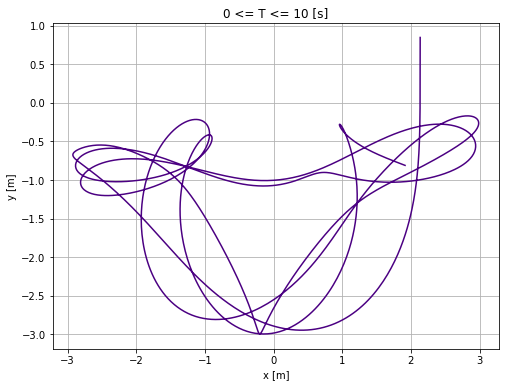

In [7]:
x_tot = x_2 + x_1
y_tot = y_2 + y_1 

plt.figure(figsize = (8,6))
plt.grid()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('0 <= T <= 10 [s]')
plt.plot(x_tot, y_tot, color = 'indigo')

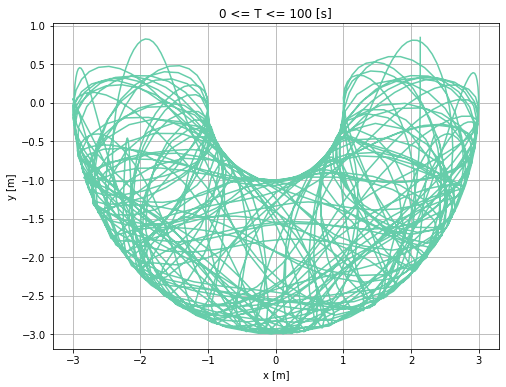

In [8]:
x_tot2 = x_3 + x_4
y_tot2 = y_3 + y_4

plt.figure(figsize = (8,6))
plt.grid()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('0 <= T <= 100 [s]')
plt.plot(x_tot2, y_tot2, color = 'mediumaquamarine')

# LESSON TO SELF:
### Next time check all your variables carefully before you do anything. Don't write l1 as l2 again like what you did here which took you 3 days to find...